In [1]:
import h5py
import numpy as np
import math
import scipy
from scipy import signal
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline as spline
from scipy.fftpack import fft, fftshift ,ifft,rfft,fftfreq,rfftfreq
c=2.9979e10
G=6.67408e-8
Msun=1.989e33
Length = G*Msun/c**2
Time = Length/c
Frequency=1/Time

Define functions for the FFT and the analysis

In [2]:
def fre_do(x,y,mass):
    fd=fft(y)
    N=len(y)
    if (N % 2) == 1:
        N=N+1
    T=x[1]-x[0]
    xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
    fq=fftfreq(len(y))
    mask=fq>=0
    fd=2.0*(fd/N)
    fd=fd[mask]
    fd=abs(fd)
    return xf,fd
    

In [3]:
def analyze(rhM,time,mass):
    
    
    
    peaks,prop=scipy.signal.find_peaks(abs(rhM))
    ampls=rhM[peaks]
    merg=np.amax(abs(ampls))
    merg=np.where(abs(ampls)==merg)
    merg=int(merg[0])
    t0=peaks[merg]
    
    ampl=rhM[t0:]
    tim=time[t0:]
    
    #ampl=rhM
    #tim=time
    
    tuk=signal.tukey(len(ampl))
    dat=ampl*tuk
    
    fq,fd=fre_do(tim,dat,mass)
    
    mx=np.where(fd==np.amax(fd))[0][0]
    freq=fq[mx]
    amp=fd[mx]
    
    return fq,fd,tim,dat
    

Example of the analysis

Get the data in arrays

In [4]:
f=open('data/15H_135_135','r')
lines=f.readlines()
result1=[]
result2=[]
for x in lines:
    for i in range(len(x.split(' '))):
        if x.split(' ')[i]!='':
            result1.append(x.split(' ')[i])
            for j in range(i+1,len(x.split(' '))): 
                if x.split(' ')[j]!='':
                    result2.append(x.split(' ')[j])
                    break
            break
        
    


In [5]:
time=np.zeros(len(result1))
strain=np.zeros(len(result1))
for i in range(len(result1)):

    time[i]=float(result1[i])
    strain[i]=float(result2[i])
print(i)    
    

64584


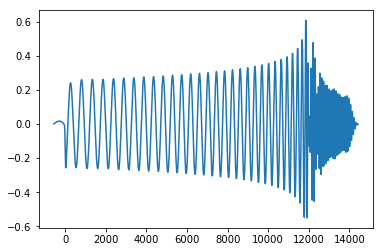

In [6]:
plt.plot(time,strain)
plt.show()

Do the analysis

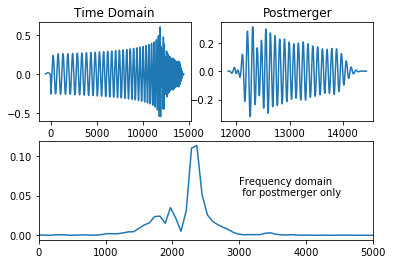

In [7]:
freq2,amp2,tim,post=analyze(strain,time,2.7)
#print(freq2)
plt.subplot(212)
plt.plot((freq2*Frequency),amp2)
plt.xlim(0,5000)
plt.text(3000,0.05,'Frequency domain \n for postmerger only')
plt.subplot(222)
plt.plot(tim,post)
plt.title('Postmerger')
plt.subplot(221)
plt.plot(time,strain)
plt.title('Time Domain')
plt.show()

Now use this to do the analysis for all the data

In [8]:
EOS=['15H','125H','H','HB','B','SFHo']
MASS=['135_135','125_146','125_125','121_151','118_155','117_156','116_158','112_140','107_146']

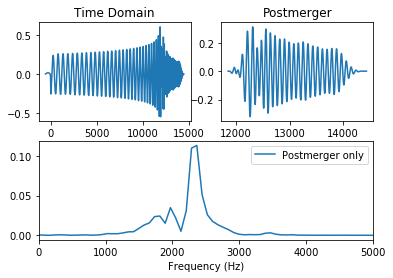

15H_135_135 2.7


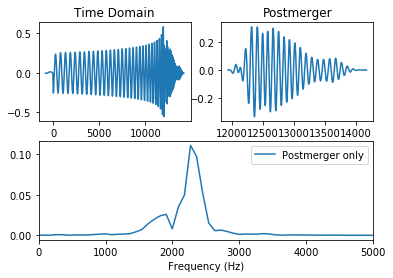

15H_125_146 2.71


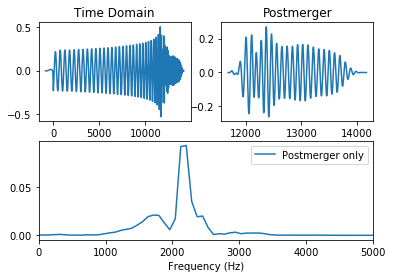

15H_125_125 2.5


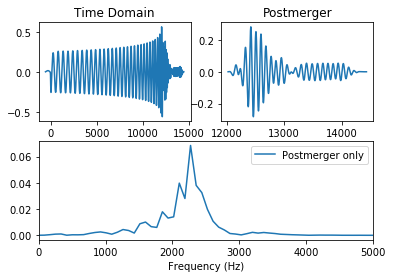

15H_121_151 2.7199999999999998


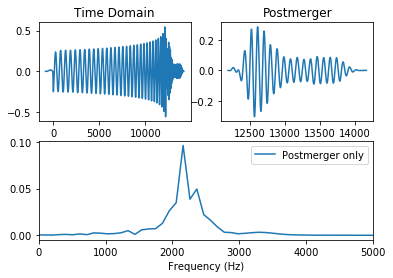

15H_118_155 2.73


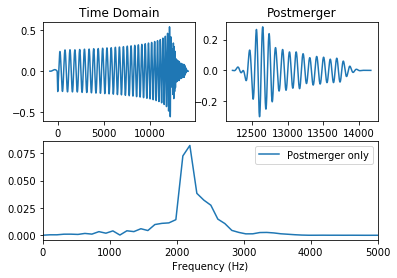

15H_117_156 2.73


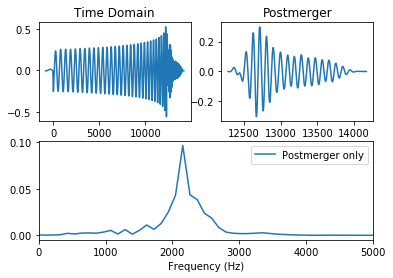

15H_116_158 2.74


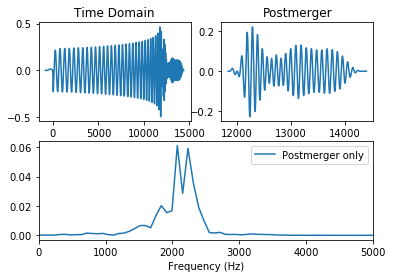

15H_112_140 2.52


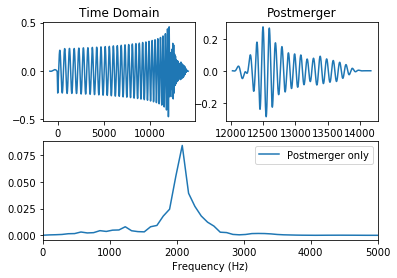

15H_107_146 2.5300000000000002


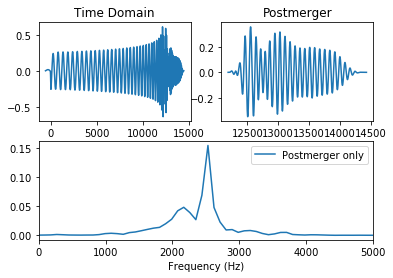

125H_135_135 2.7


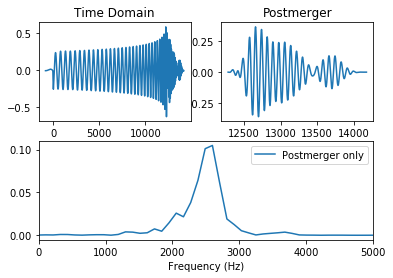

125H_125_146 2.71


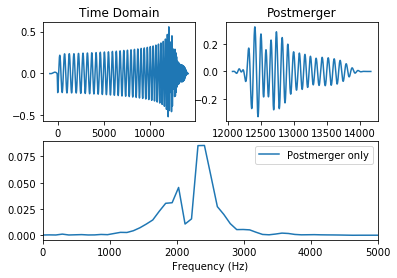

125H_125_125 2.5


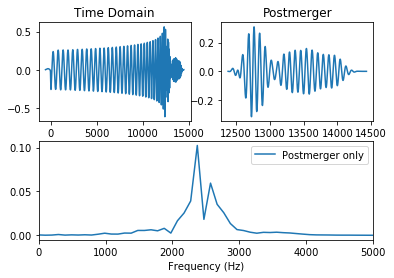

125H_121_151 2.7199999999999998


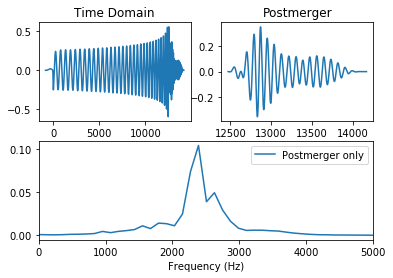

125H_118_155 2.73


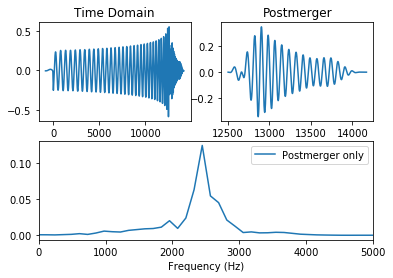

125H_117_156 2.73


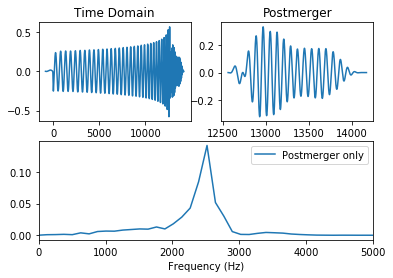

125H_116_158 2.74


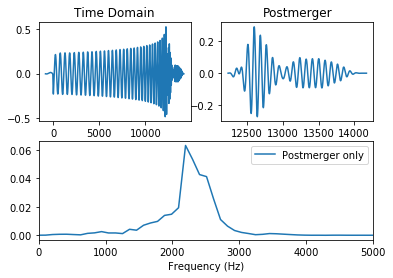

125H_112_140 2.52


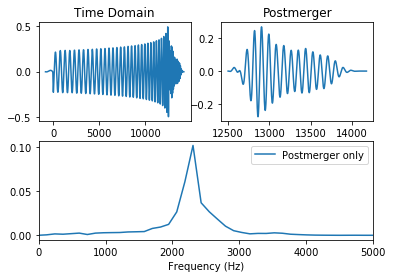

125H_107_146 2.5300000000000002


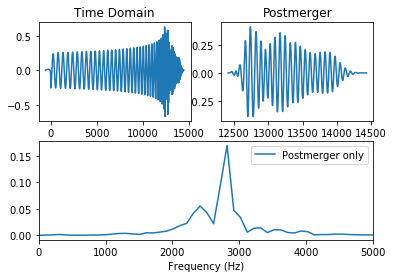

H_135_135 2.7


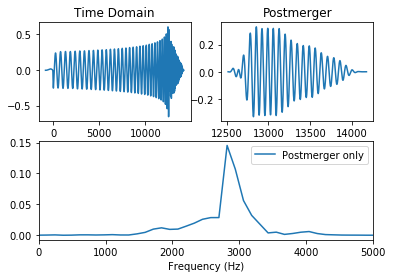

H_125_146 2.71


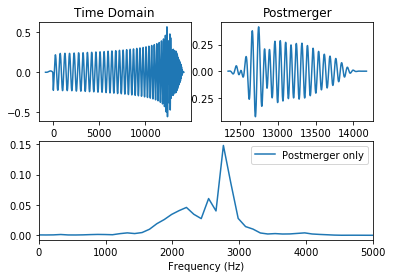

H_125_125 2.5


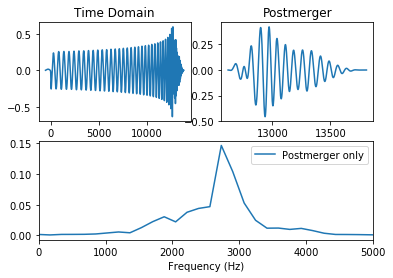

H_121_151 2.7199999999999998


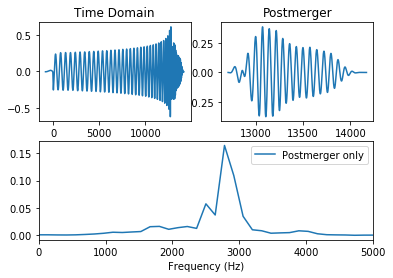

H_118_155 2.73


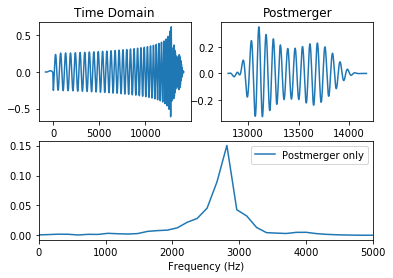

H_117_156 2.73


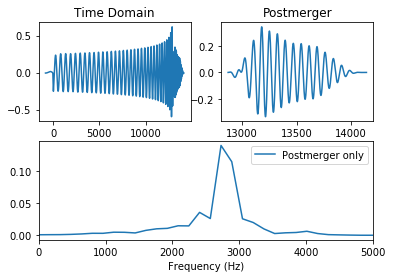

H_116_158 2.74


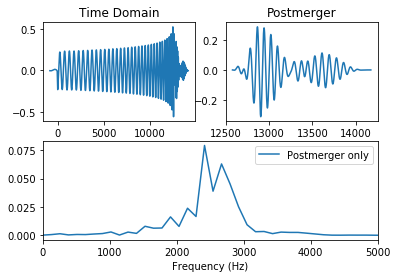

H_112_140 2.52


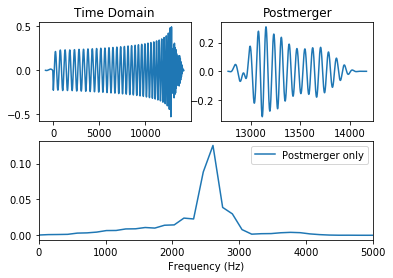

H_107_146 2.5300000000000002


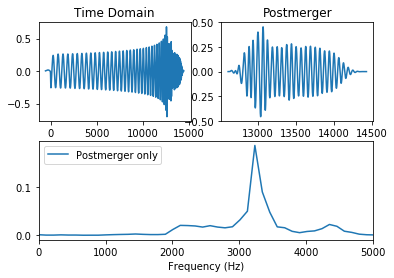

HB_135_135 2.7


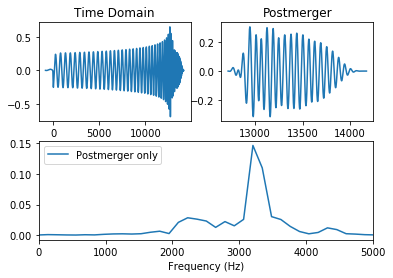

HB_125_146 2.71


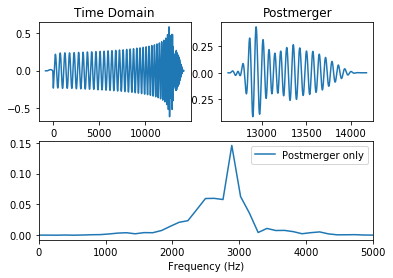

HB_125_125 2.5


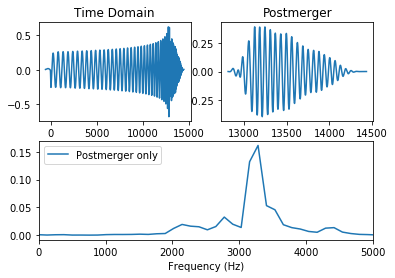

HB_121_151 2.7199999999999998


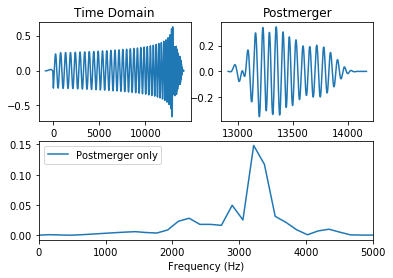

HB_118_155 2.73


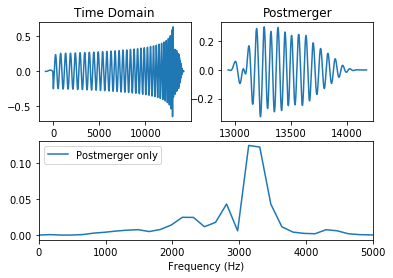

HB_117_156 2.73


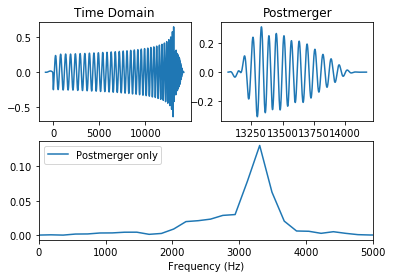

HB_116_158 2.74


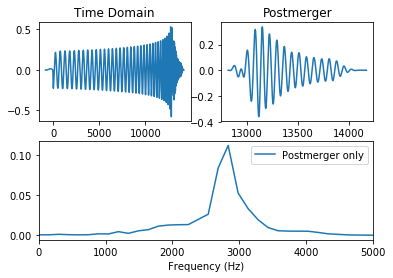

HB_112_140 2.52


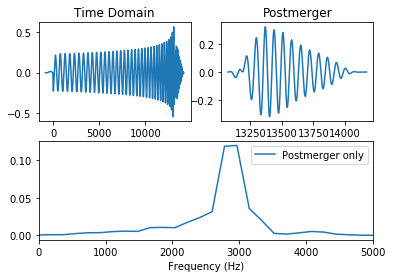

HB_107_146 2.5300000000000002


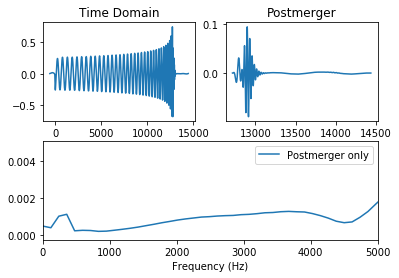

B_135_135 2.7


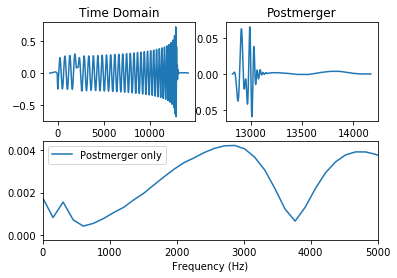

B_125_146 2.71


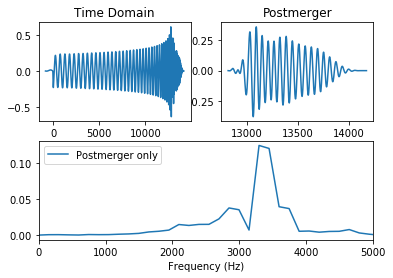

B_125_125 2.5


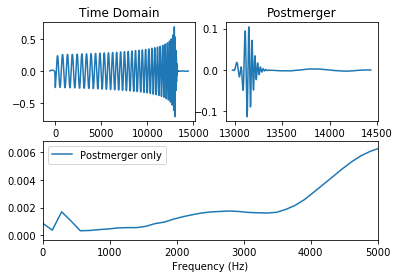

B_121_151 2.7199999999999998


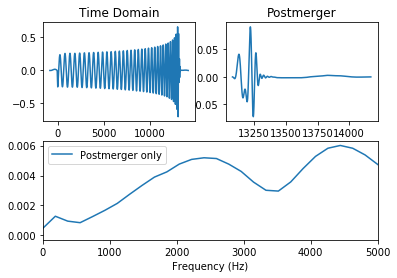

B_118_155 2.73


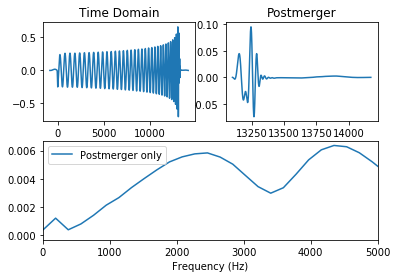

B_117_156 2.73


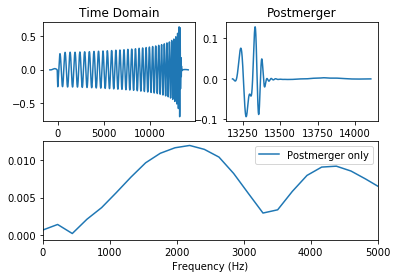

B_116_158 2.74


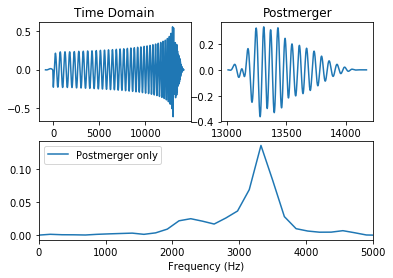

B_112_140 2.52


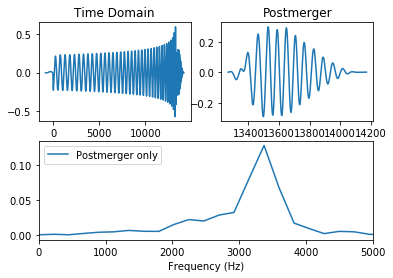

B_107_146 2.5300000000000002


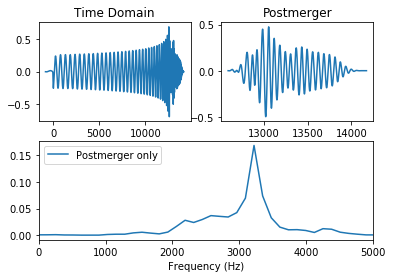

SFHo_135_135 2.7


In [9]:
for eos in EOS:
    if eos!='SFHo':
        for mas in MASS:
                        
            f=open('data/'+eos+'_'+mas,'r')
            lines=f.readlines()
            result1=[]
            result2=[]
            for x in lines:
                for i in range(len(x.split(' '))):
                    if x.split(' ')[i]!='':
                        result1.append(x.split(' ')[i])
                        for j in range(i+1,len(x.split(' '))): 
                            if x.split(' ')[j]!='':
                                result2.append(x.split(' ')[j])
                                break
                        break
        
            time=np.zeros(len(result1))
            strain=np.zeros(len(result1))
            for i in range(len(result1)):
                time[i]=float(result1[i])
                strain[i]=float(result2[i])
            mastot=float(mas.split('_')[0])/100+float(mas.split('_')[1])/100
            freq2,amp2,tim,post=analyze(strain,time,mastot)
            plt.subplot(212)
            plt.plot((freq2*Frequency),amp2)
            plt.xlim(0,5000)
            plt.xlabel('Frequency (Hz)')
            plt.legend(['Postmerger only'])
            plt.subplot(222)
            plt.plot(tim,post)
            plt.title('Postmerger')
            plt.subplot(221)
            plt.plot(time,strain)
            plt.title('Time Domain')
            plt.show()
            print(eos+'_'+mas,mastot)
    else:
            mas=MASS[0]
            f=open('data/'+eos+'_'+mas,'r')
            lines=f.readlines()
            result1=[]
            result2=[]
            for x in lines:
                for i in range(len(x.split(' '))):
                    if x.split(' ')[i]!='':
                        result1.append(x.split(' ')[i])
                        for j in range(i+1,len(x.split(' '))): 
                            if x.split(' ')[j]!='':
                                result2.append(x.split(' ')[j])
                                break
                        break
        
            time=np.zeros(len(result1))
            strain=np.zeros(len(result1))
            for i in range(len(result1)):
                time[i]=float(result1[i])
                strain[i]=float(result2[i])
            mastot=float(mas.split('_')[0])/100+float(mas.split('_')[1])/100
            freq2,amp2,tim,post=analyze(strain,time,mastot)
            plt.subplot(212)
            plt.plot((freq2*Frequency),amp2)
            plt.xlim(0,5000)
            plt.xlabel('Frequency (Hz)')
            plt.legend(['Postmerger only'])
            plt.subplot(222)
            plt.plot(tim,post)
            plt.title('Postmerger')
            plt.subplot(221)
            plt.plot(time,strain)
            plt.title('Time Domain')
            plt.show()
            print(eos+'_'+mas,mastot)
        

        

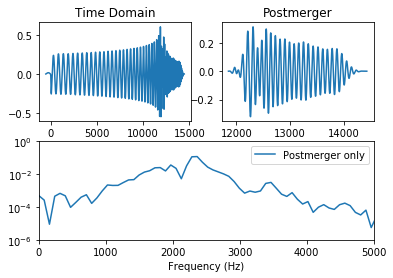

15H_135_135 2.7


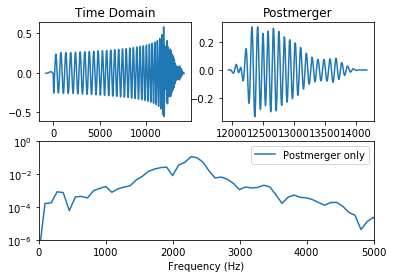

15H_125_146 2.71


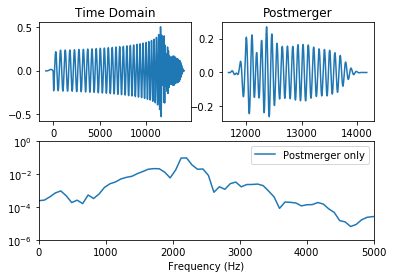

15H_125_125 2.5


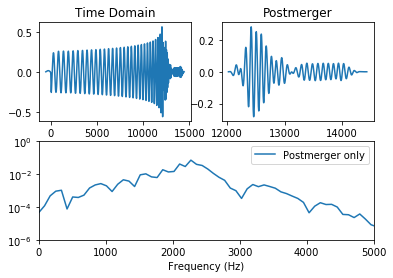

15H_121_151 2.7199999999999998


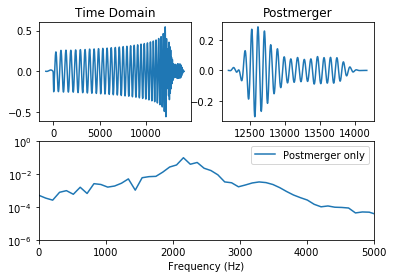

15H_118_155 2.73


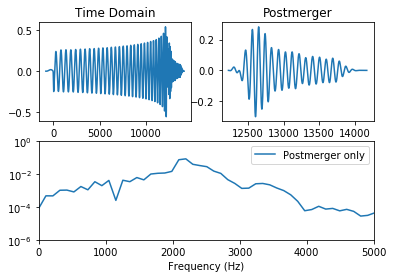

15H_117_156 2.73


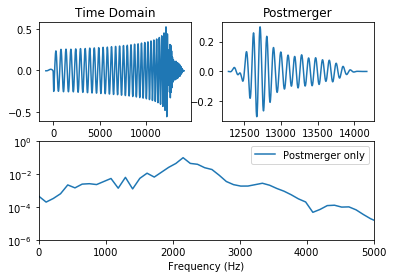

15H_116_158 2.74


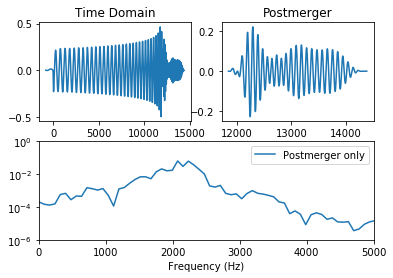

15H_112_140 2.52


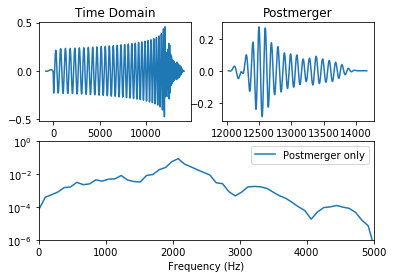

15H_107_146 2.5300000000000002


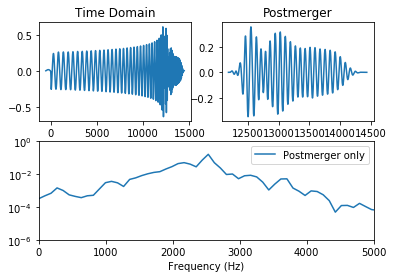

125H_135_135 2.7


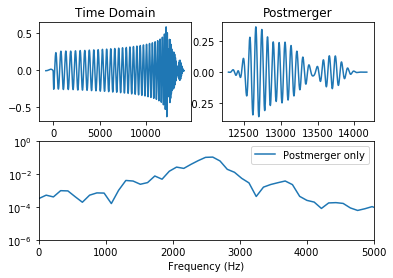

125H_125_146 2.71


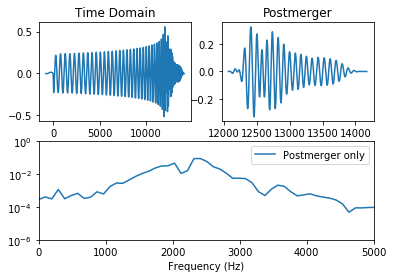

125H_125_125 2.5


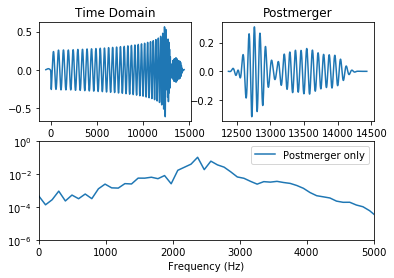

125H_121_151 2.7199999999999998


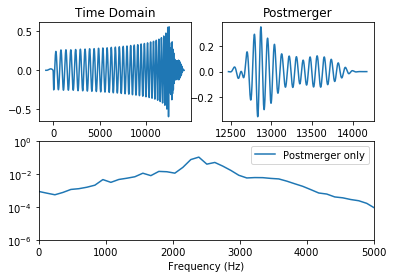

125H_118_155 2.73


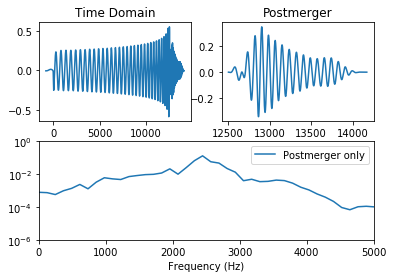

125H_117_156 2.73


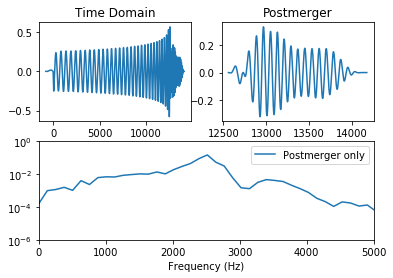

125H_116_158 2.74


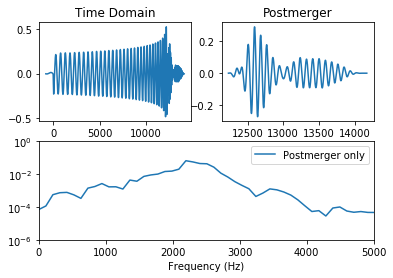

125H_112_140 2.52


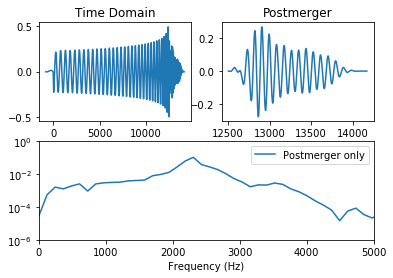

125H_107_146 2.5300000000000002


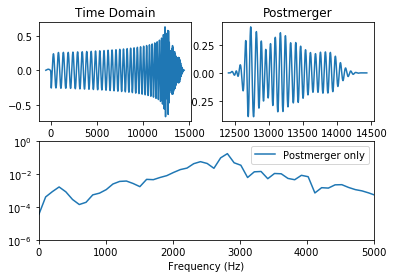

H_135_135 2.7


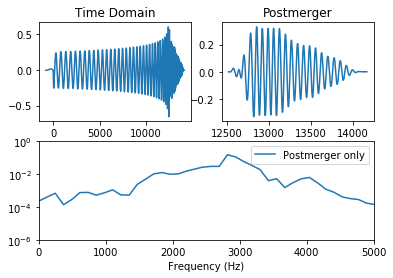

H_125_146 2.71


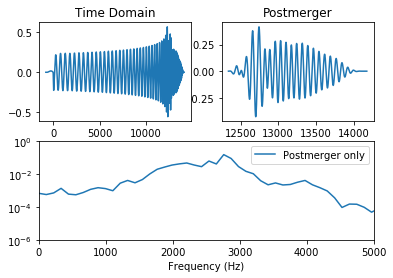

H_125_125 2.5


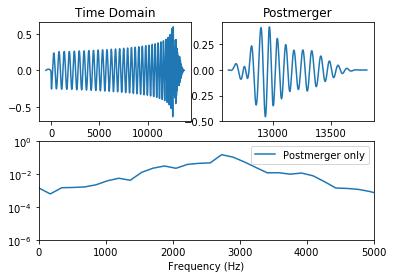

H_121_151 2.7199999999999998


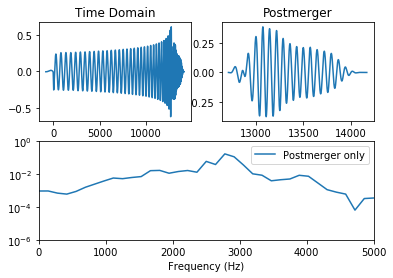

H_118_155 2.73


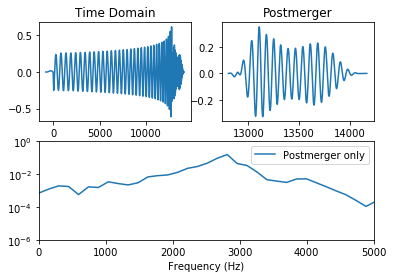

H_117_156 2.73


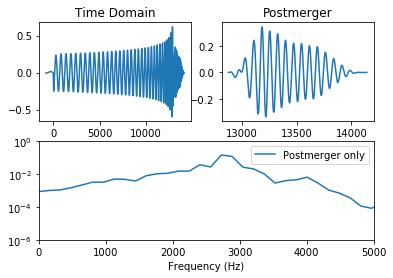

H_116_158 2.74


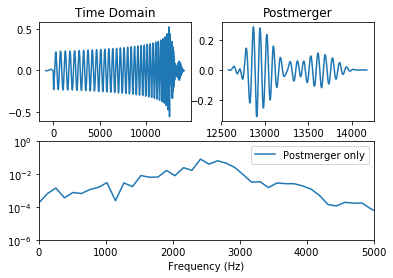

H_112_140 2.52


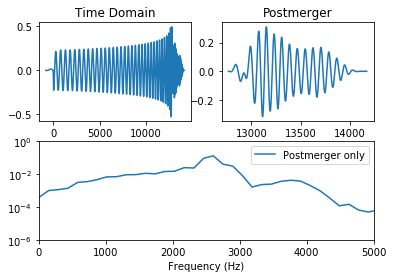

H_107_146 2.5300000000000002


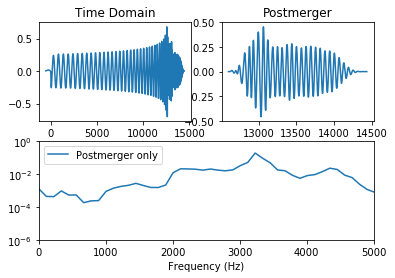

HB_135_135 2.7


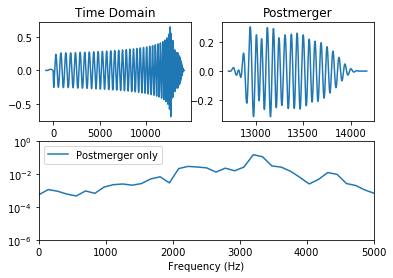

HB_125_146 2.71


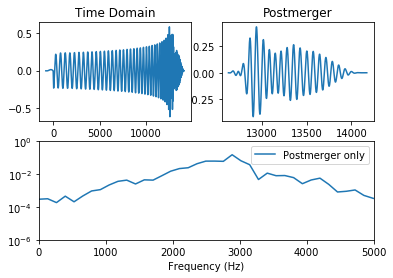

HB_125_125 2.5


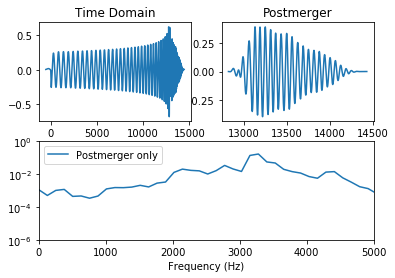

HB_121_151 2.7199999999999998


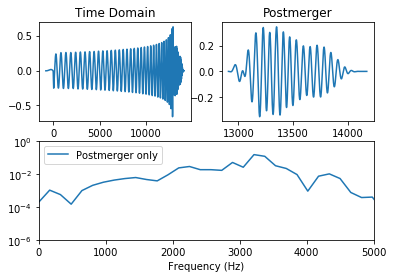

HB_118_155 2.73


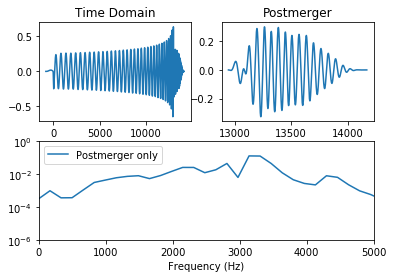

HB_117_156 2.73


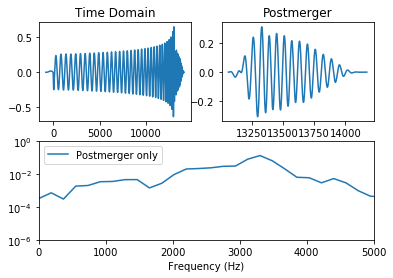

HB_116_158 2.74


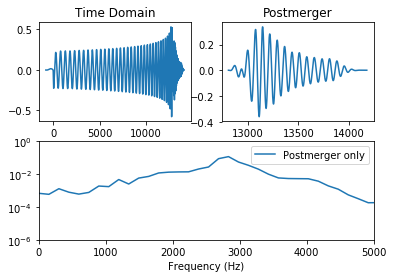

HB_112_140 2.52


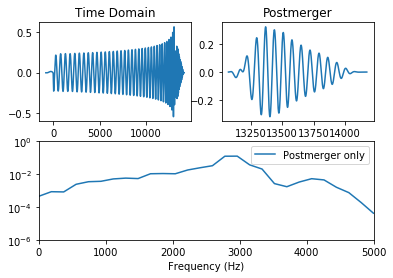

HB_107_146 2.5300000000000002


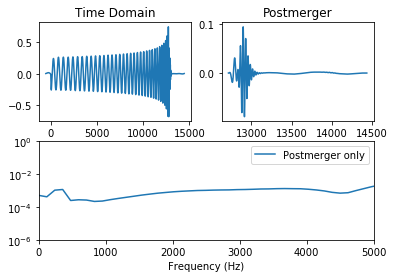

B_135_135 2.7


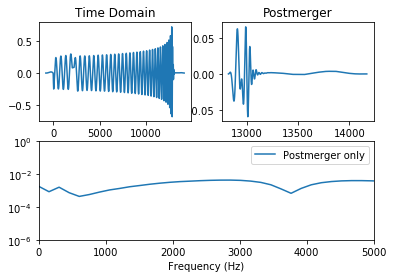

B_125_146 2.71


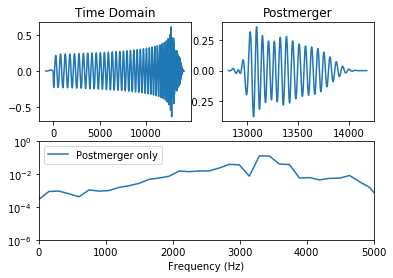

B_125_125 2.5


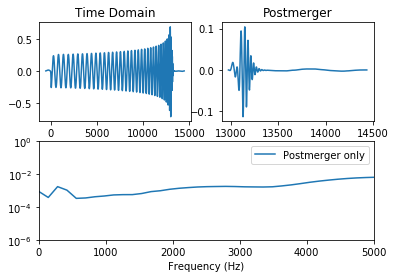

B_121_151 2.7199999999999998


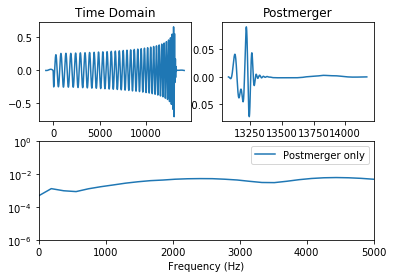

B_118_155 2.73


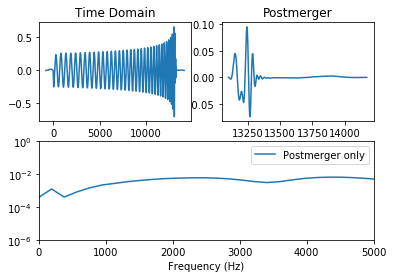

B_117_156 2.73


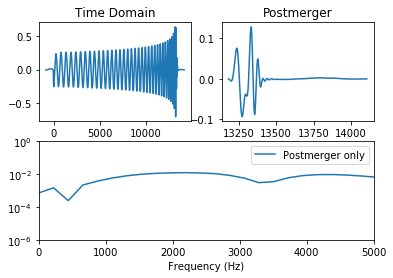

B_116_158 2.74


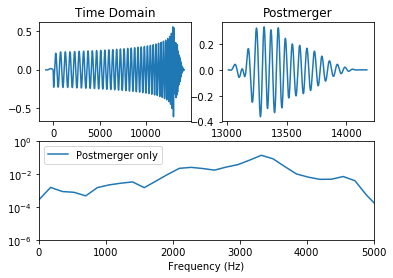

B_112_140 2.52


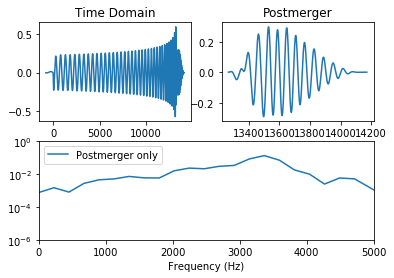

B_107_146 2.5300000000000002


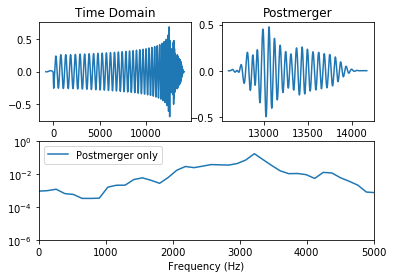

SFHo_135_135 2.7


In [10]:
for eos in EOS:
    if eos!='SFHo':
        for mas in MASS:
                        
            f=open('data/'+eos+'_'+mas,'r')
            lines=f.readlines()
            result1=[]
            result2=[]
            for x in lines:
                for i in range(len(x.split(' '))):
                    if x.split(' ')[i]!='':
                        result1.append(x.split(' ')[i])
                        for j in range(i+1,len(x.split(' '))): 
                            if x.split(' ')[j]!='':
                                result2.append(x.split(' ')[j])
                                break
                        break
        
            time=np.zeros(len(result1))
            strain=np.zeros(len(result1))
            for i in range(len(result1)):
                time[i]=float(result1[i])
                strain[i]=float(result2[i])
            mastot=float(mas.split('_')[0])/100+float(mas.split('_')[1])/100
            freq2,amp2,tim,post=analyze(strain,time,mastot)
            plt.subplot(212)
            plt.plot((freq2*Frequency),amp2)
            plt.yscale('log')
            plt.ylim(10**(-6),1)
            plt.xlim(0,5000)
            plt.xlabel('Frequency (Hz)')
            plt.legend(['Postmerger only'])
            plt.subplot(222)
            plt.plot(tim,post)
            plt.title('Postmerger')
            plt.subplot(221)
            plt.plot(time,strain)
            plt.title('Time Domain')
            plt.show()
            print(eos+'_'+mas,mastot)
    else:
            mas=MASS[0]
            f=open('data/'+eos+'_'+mas,'r')
            lines=f.readlines()
            result1=[]
            result2=[]
            for x in lines:
                for i in range(len(x.split(' '))):
                    if x.split(' ')[i]!='':
                        result1.append(x.split(' ')[i])
                        for j in range(i+1,len(x.split(' '))): 
                            if x.split(' ')[j]!='':
                                result2.append(x.split(' ')[j])
                                break
                        break
        
            time=np.zeros(len(result1))
            strain=np.zeros(len(result1))
            for i in range(len(result1)):
                time[i]=float(result1[i])
                strain[i]=float(result2[i])
            mastot=float(mas.split('_')[0])/100+float(mas.split('_')[1])/100
            freq2,amp2,tim,post=analyze(strain,time,mastot)
            plt.subplot(212)
            plt.plot((freq2*Frequency),amp2)
            plt.yscale('log')
            plt.ylim(10**(-6),1)
            plt.xlim(0,5000)
            plt.xlabel('Frequency (Hz)')
            plt.legend(['Postmerger only'])
            plt.subplot(222)
            plt.plot(tim,post)
            plt.title('Postmerger')
            plt.subplot(221)
            plt.plot(time,strain)
            plt.title('Time Domain')
            plt.show()
            print(eos+'_'+mas,mastot)
        

        